In [1]:
import pandas as pd
import numpy as np
import csv
from tqdm import tqdm
import itertools
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import date
from os.path import join, isfile
from os import listdir
import time
from sklearn.preprocessing import Normalizer, StandardScaler

In [13]:
def read_rep(syn_name, syn_csv, ID_csv, data_dir):
    
    # open directories
    syn_dir = data_dir+"\\{}-patients".format(syn_name)
    ID_dir = data_dir+ "\\{}-selected-ID-controls".format(syn_name)

    # get list of filenames
    files_syn = [f for f in listdir(syn_dir) if (isfile(join(syn_dir, f))) and ".jpg" in f]
    files_ID = [f for f in listdir(ID_dir) if (isfile(join(ID_dir, f))) and ".jpg" in f]
    
    data_syn, data_ID = [], []

    with open (syn_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for index, row in enumerate(reader):
            if row[0] in files_syn: 
                rep = list(map(float, row[1:]))
                data_syn.append(rep)

    with open (ID_csv, newline='') as file:
        reader = csv.reader(file, delimiter=',')
        for index, row in enumerate(reader):
            if row[0] in files_ID:
                rep = list(map(float, row[1:]))
                data_ID.append(rep)

    return data_syn, data_ID

In [3]:
def plot_pca_tsne(data, labels):
    plt.figure(figsize=(12,6))
    plt.plot([1,2])

    # visualize data in tnse (men/women)
    X_embedded_tsne = TSNE(n_components=2, init='pca').fit_transform(data)

    plt.subplot(121)
    unique = list(set(labels))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    for i, u in enumerate(unique):
        xi = [X_embedded_tsne[j, 0] for j  in range(len(X_embedded_tsne[:,0])) if labels[j] == u]
        yi = [X_embedded_tsne[j, 1] for j  in range(len(X_embedded_tsne[:,1])) if labels[j] == u]
        plt.scatter(xi, yi, c=[colors[i]], label=str(u))
    plt.legend()
    plt.title("t-sne for syndromes")

    # visualize data in pca (men/women)
    X_embedded_pca = PCA(n_components=2).fit_transform(data)

    plt.subplot(122)
    unique = list(set(labels))
    colors = [plt.cm.jet(float(i)/max(unique)) for i in unique]
    for i, u in enumerate(unique):
        xi = [X_embedded_pca[j, 0] for j  in range(len(X_embedded_pca[:,0])) if labels[j] == u]
        yi = [X_embedded_pca[j, 1] for j  in range(len(X_embedded_pca[:,1])) if labels[j] == u]
        plt.scatter(xi, yi, c=[colors[i]], label=str(u))
    plt.legend()
    plt.title("pca for syndromes")

    plt.show()

In [4]:
def plot_roc_curve(y_true, y_pred): 
    fpr, tpr, thresholds = roc_curve(y_true, y_pred)
    plt.figure(1, figsize=(12,6))
    roc_auc = roc_auc_score(y_true, y_pred)
    plt.plot(fpr, tpr, lw=2, alpha=0.5, label='LOOCV ROC (AUC = %0.2f)' % (roc_auc))
    plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='k', label='Chance level', alpha=.8)
    plt.xlim([-0.05, 1.05])
    plt.ylim([-0.05, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid()
    plt.show()

In [5]:
def normalize(data, i):

    if i == 0:
        return data
    
    if i == 1:
        return Normalizer().fit_transform(data)
        
    if i == 2:
        return StandardScaler().fit_transform(data)

All Deepface

(294, 4096)
(294,)


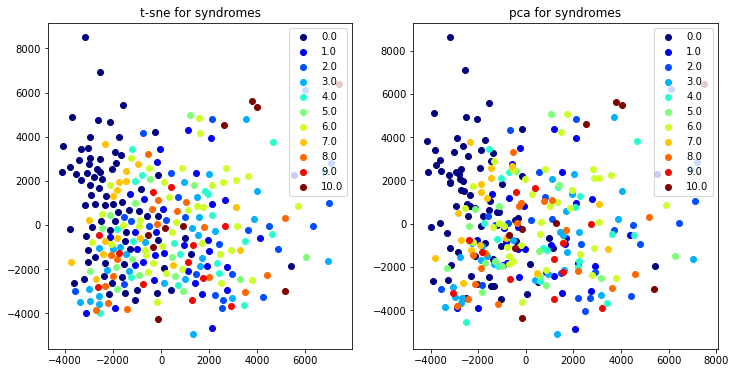

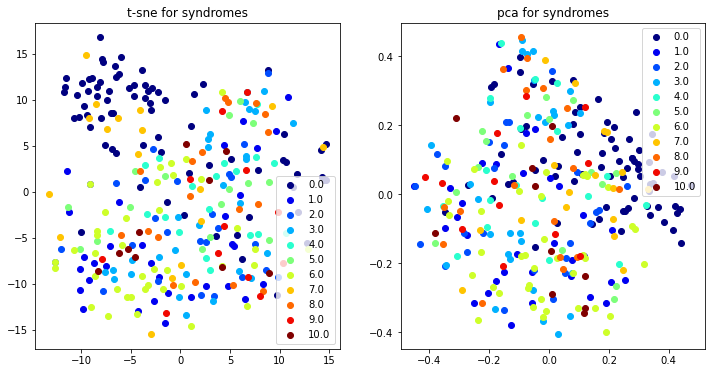

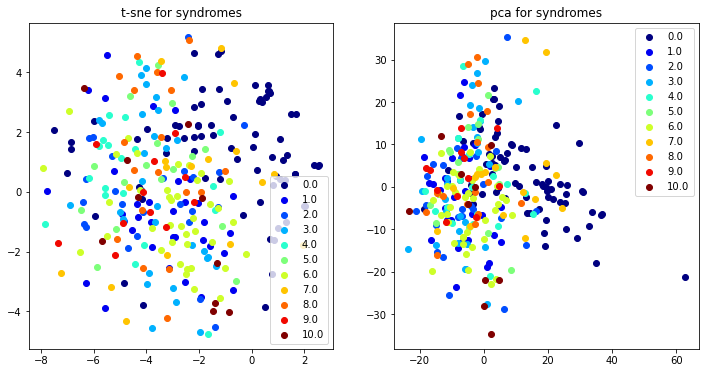

In [6]:
syn_list = ['KDVS','ADNP', 'ANKRD11', 'CDK13', 'DEAF1', 'DYRK1A', 'EHMT1', 'FBXO11', 'SON', 'WAC', 'YY1']   
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien" 
          
# load data, concatenate everything, label with which syndrome
all_data = []
all_labels = []
for index, syn in enumerate(syn_list):
    
    data_dir = GENERAL_DIR + "\\{}".format(syn)
    
    syn_csv = data_dir+"\\representations\{}-patients-deepface.csv".format(syn)
    data = read_rep(syn, syn_csv, data_dir)
    all_data += data
    all_labels += (np.ones(len(data))* index).tolist()
    
all_data = np.array(all_data)
all_labels = np.array(all_labels)
print(all_data.shape)
print(all_labels.shape)
plot_pca_tsne(all_data, all_labels)

all_data_norm = normalize(all_data, 1)
plot_pca_tsne(all_data_norm, all_labels)


all_data_stand = normalize(all_data, 2)
plot_pca_tsne(all_data_stand, all_labels)

Deepface per syndrome

KDVS


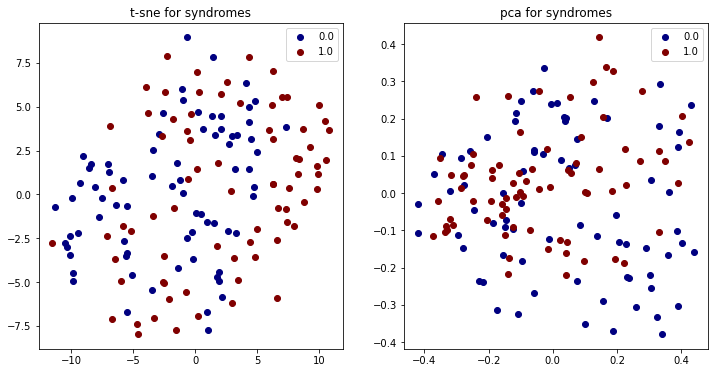

ADNP


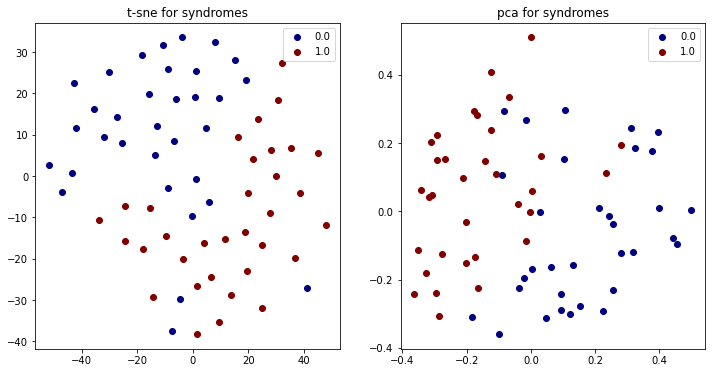

ANKRD11


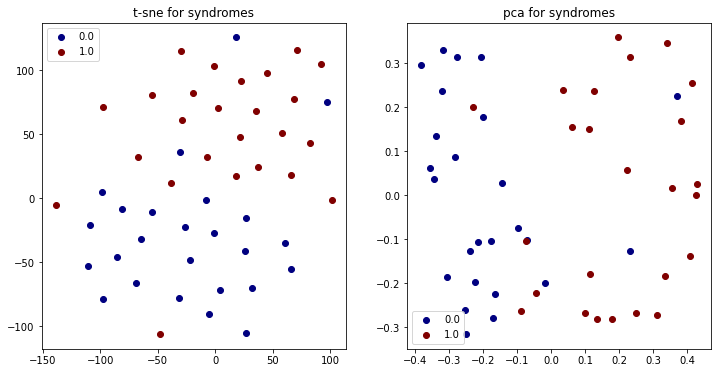

CDK13


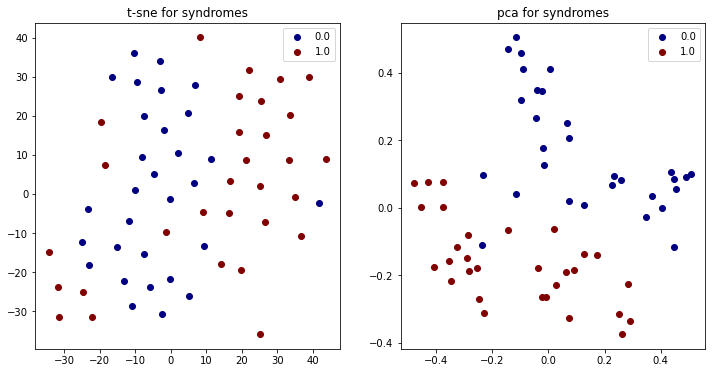

DEAF1


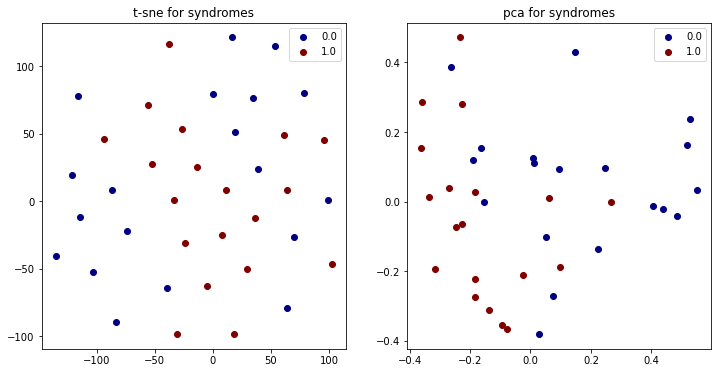

DYRK1A


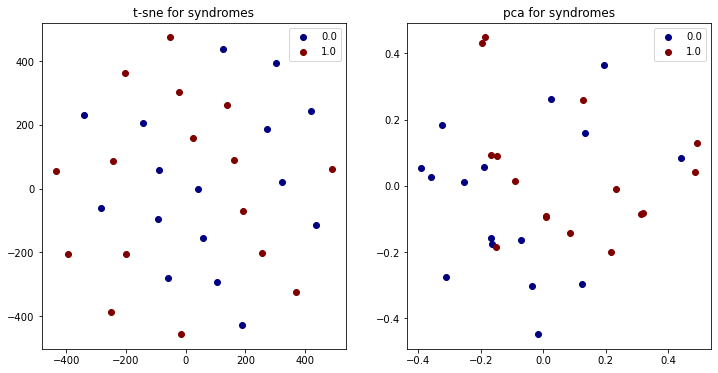

EHMT1


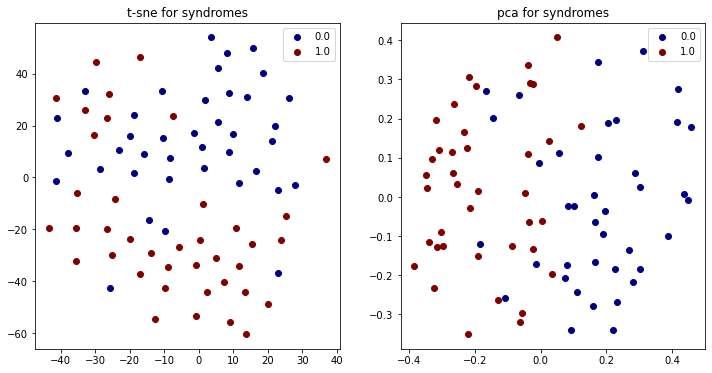

FBXO11


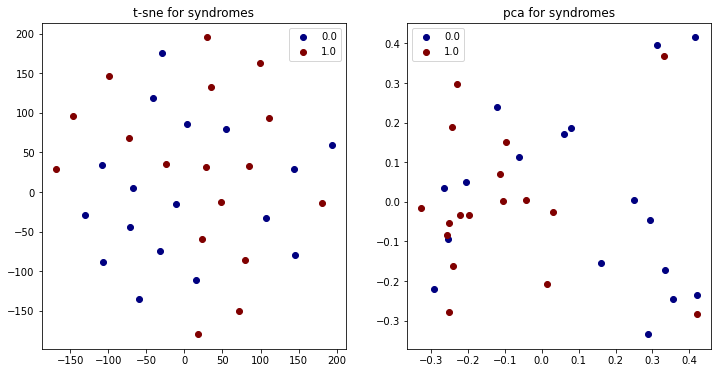

SON


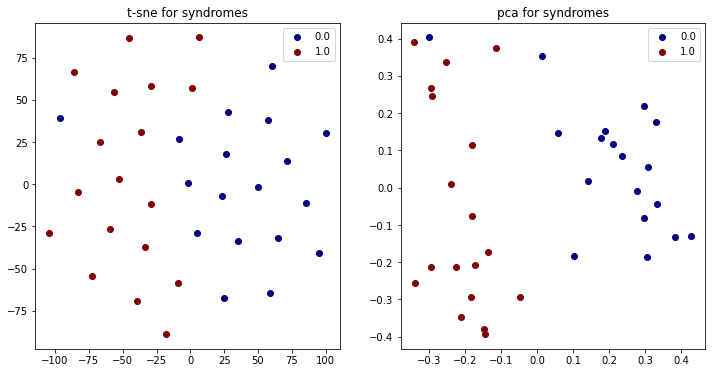

WAC


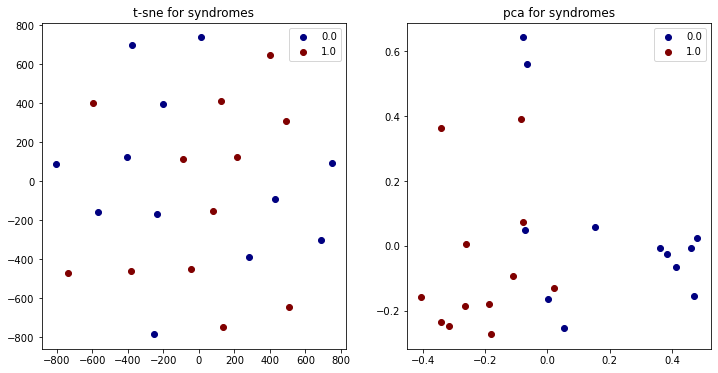

YY1


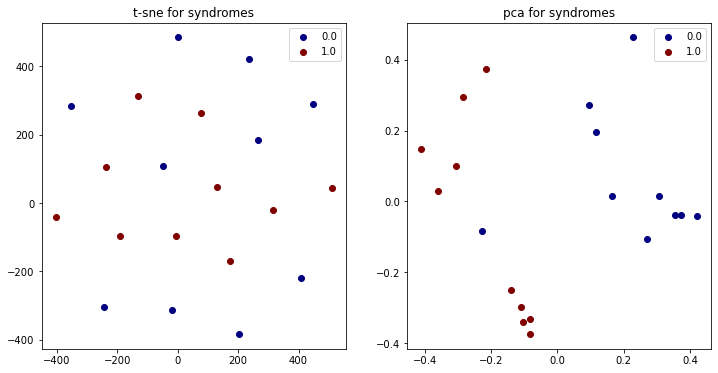

In [16]:
syn_list = ['KDVS','ADNP', 'ANKRD11', 'CDK13', 'DEAF1', 'DYRK1A', 'EHMT1', 'FBXO11', 'SON', 'WAC', 'YY1']   
GENERAL_DIR = r"H:\Genetica Projecten\Facial Recognition\Studenten en Onderzoekers\Fien" 
          
# load data, concatenate everything, label with which syndrome
all_data = []
all_labels = []
for index, syn in enumerate(syn_list):
    
    data_dir = GENERAL_DIR + "\\{}".format(syn)
    
    syn_csv = data_dir+"\\representations\{}-patients-deepface.csv".format(syn)
    ID_csv  = data_dir+"\\representations\ID-controls-deepface.csv"
    data_syn, data_ID = read_rep(syn, syn_csv, ID_csv, data_dir)
    
    print(syn)
    
    all_data = np.array(data_syn + data_ID)
    all_labels = np.ones(len(data_syn)).tolist() + np.zeros(len(data_ID)).tolist()
    all_data = normalize(all_data, 1)
    plot_pca_tsne(all_data, all_labels)


Random Forest

(202, 72630)
(202,)


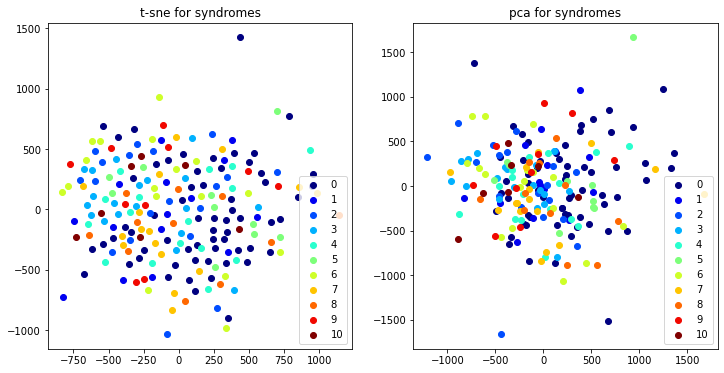

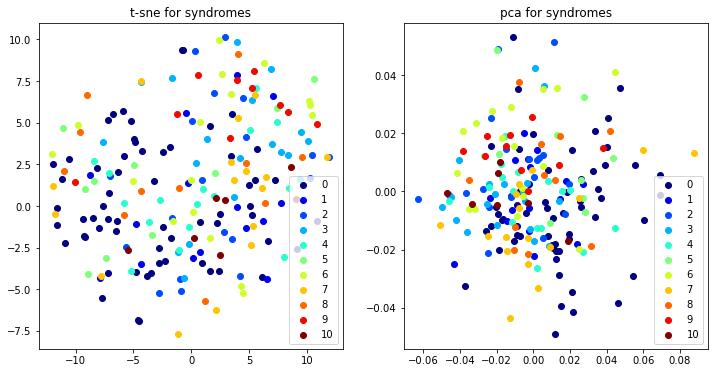

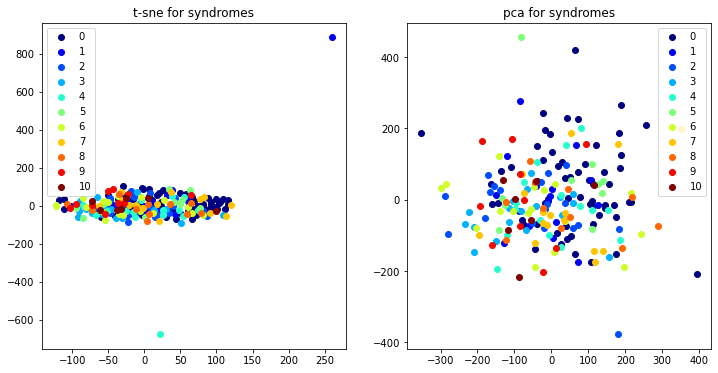

In [11]:
# load data, concatenate everything, label with which syndrome
all_data = []
all_labels = []
for index, syn in enumerate(syn_list):
    
    data_dir = GENERAL_DIR + "\\{}".format(syn)
    syn_csv = GENERAL_DIR+ "\\features_facereader_landmarks_distances_patient_groups_left_right.csv"
    data = read_rep(syn, syn_csv, data_dir)  
    for item in data:
        if len(item) == 72630:
            all_data.append(item)
            all_labels.append(index)
    
all_data = np.array(all_data)
all_labels = np.array(all_labels)
print(all_data.shape)
print(all_labels.shape)
plot_pca_tsne(all_data, all_labels)

all_data_norm = normalize(all_data, 1)
plot_pca_tsne(all_data_norm, all_labels)


all_data_stand = normalize(all_data, 2)
plot_pca_tsne(all_data_stand, all_labels)